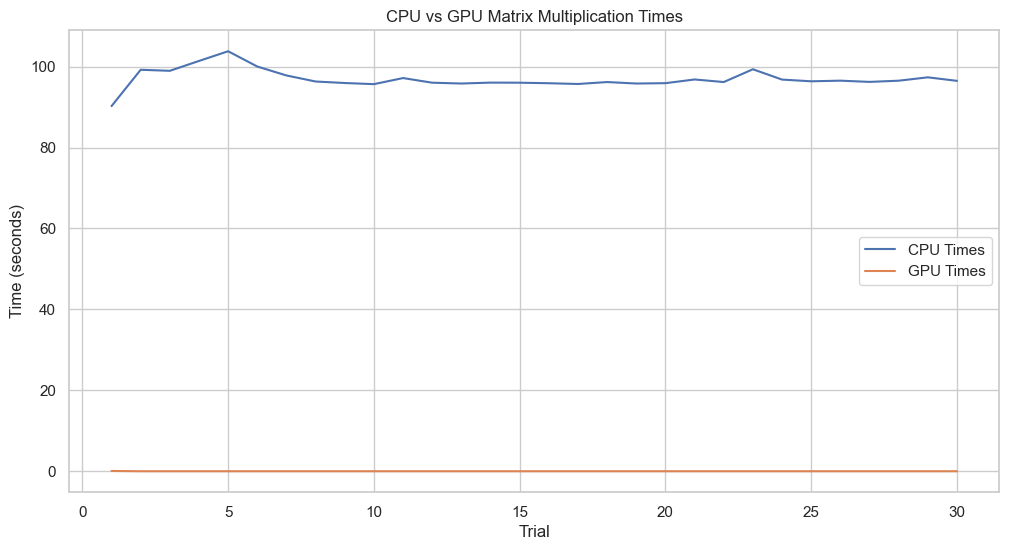

In [2]:
import torch
import time

def cpu_matrix_multiplication(matrix_size):
    a = torch.rand(matrix_size, matrix_size)
    b = torch.rand(matrix_size, matrix_size)
    start_time = time.time()
    c = torch.matmul(a, b)
    end_time = time.time()
    return end_time - start_time

def gpu_matrix_multiplication(matrix_size):
    if torch.backends.mps.is_available():
        mps_device = torch.device("mps")
        a = torch.rand(matrix_size, matrix_size, device=mps_device)
        b = torch.rand(matrix_size, matrix_size, device=mps_device)
        start_time = time.time()
        c = torch.matmul(a, b)
        end_time = time.time()
        return end_time - start_time
    else:
        return None

# Adjust the matrix size based on your system's capability
matrix_size = 50000  # Example size
num_trials = 30

cpu_times = []
gpu_times = []
for _ in range(num_trials):
    cpu_time = cpu_matrix_multiplication(matrix_size)
    gpu_time = gpu_matrix_multiplication(matrix_size)
    cpu_times.append(cpu_time)
    gpu_times.append(gpu_time if gpu_time is not None else float('nan'))

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_trials + 1), cpu_times, label='CPU Times')
plt.plot(range(1, num_trials + 1), gpu_times, label='GPU Times')
plt.xlabel('Trial')
plt.ylabel('Time (seconds)')
plt.title('CPU vs GPU Matrix Multiplication Times')
plt.legend()
plt.show()
